# Exemplo 1: Um perceptron simples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    print(data)
    
    # make the dataset linearly separable
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data
data = load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


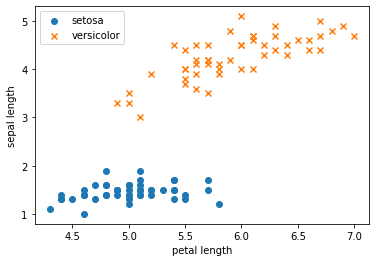

In [2]:
# Visualizaing the datas
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [3]:
# Defining the perceptron
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    
    # set weights to zero
    w = np.zeros(shape=(1, features.shape[1]+1))
    
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1)
            y = np.dot(w, x.transpose())
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label.item(0,0) - target)
            
            if(delta): # misclassified
                misclassified += 1
                w += (delta * x)
        
        misclassified_.append(misclassified)
    return (w, misclassified_)
             
num_iter = 10
w, misclassified_ = perceptron(data, num_iter)

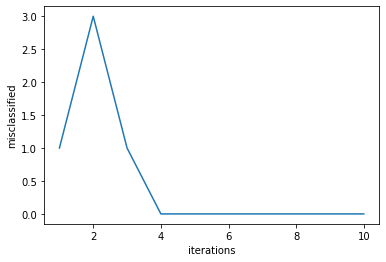

In [4]:
# Algorithm converge from the 4th iteration
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

# Exemplo 2: Base de dados iris

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron 

In [15]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa?

/var/folders/8c/4qj1vrpn4zv0v54qptvr3fjr0000gn/T/ipykernel_5052/3893419151.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # Iris setosa?


In [16]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [18]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

# Exemplo 3: usando TensorFlow 2

Importante seguir os passos de instalação do TensorFlow antes de rodar o código a seguir.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.8.0'

In [3]:
keras.__version__

'2.8.0'

## Classificador de imagem

- Dados: Fashion MNIST

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [8]:
# Shape
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

- Os dados já estão divididos em treino e teste, mas não em validação. 
- Vamos reescalar a intensidade do pixel no range 0-1, por isso dividimos por 255.0 para que seja um float. 

In [10]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
# Lista com o nome das classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker",
              "Bag", "Ankle boot"]

In [12]:
# Olhando o primeiro nome no conjunto de treino
class_names[y_train[0]]

'Coat'

### Modelo

In [14]:
model = keras.models.Sequential() # modelo sequencial
model.add(keras.layers.Flatten(input_shape=[28, 28])) # primeira camada - preprocessing
model.add(keras.layers.Dense(300, activation="relu")) # camada escondida com 300 neuronios
model.add(keras.layers.Dense(100, activation="relu")) # camada escondida com 100 neuronios
model.add(keras.layers.Dense(10, activation="softmax")) 

2024-03-27 17:05:59.840259: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [20]:
model.get_layer('dense') is hidden1

True

- Os parâmetros de uma camada podem ser acessados com os métodos `get_weights()` e `set_weights()`. 

In [21]:
weights, biases = hidden1.get_weights()

In [22]:
weights

array([[-0.00946181,  0.0015028 ,  0.05971155, ...,  0.02312519,
         0.04161923,  0.01908444],
       [ 0.02473325, -0.06967049, -0.02904531, ..., -0.07180941,
        -0.01904084,  0.06067112],
       [ 0.05974896,  0.02881112, -0.03210685, ...,  0.07281812,
         0.04838354,  0.01625426],
       ...,
       [-0.04639084,  0.06796992,  0.03259836, ..., -0.050868  ,
        -0.0331317 , -0.06099945],
       [ 0.03797891,  0.04731725,  0.03361073, ..., -0.00148975,
         0.0362955 ,  0.00690753],
       [-0.04448372,  0.02468251,  0.02420811, ..., -0.06213655,
         0.03156753,  0.01967646]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

In [26]:
# Compile the model
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd", metrics = ["accuracy"])

### Treino e avaliação do modelo

In [27]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7078 - accuracy: 0.7683 - val_loss: 0.4930 - val_accuracy: 0.8374
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4866 - accuracy: 0.8295 - val_loss: 0.4453 - val_accuracy: 0.8488
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4411 - accuracy: 0.8449 - val_loss: 0.4296 - val_accuracy: 0.8516
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4142 - accuracy: 0.8550 - val_loss: 0.3974 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3943 - accuracy: 0.8620 - val_loss: 0.4443 - val_accuracy: 0.8350
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3805 - accuracy: 0.8668 - val_loss: 0.3748 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3661 - accuracy: 0.8708 - val_loss: 0.3710 - val_accuracy:

- A perda vai caindo com as iterações, e a acurácia da validação não está tão longe da acurácia do treino, então podemos dizer que não houve overfitting. 

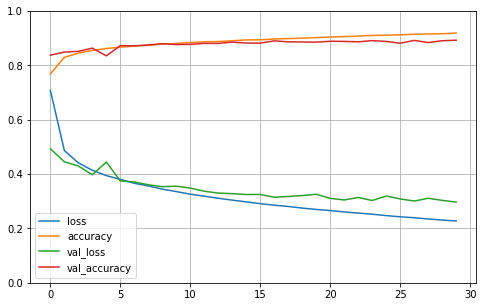

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
# Avaliando o modelo no conjunto de teste
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 67.7934 - accuracy: 0.8371


[67.79342651367188, 0.8371000289916992]

### Usando o modelo para fazer predição

In [30]:
X_new = X_test[:3] # primeiras 3 observações da base de teste

In [31]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

- Vemos uma probablidade por classe (da 0 a 9). 
- Podemos ver a que tipo de peça se refere cada um.

In [36]:
y_probabilities = model.predict(X_new)
y_pred = y_probabilities.argmax(axis=-1)
print(y_pred)

[9 2 1]


In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
# Checando se o modelo acertou
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

- O modelo classificou corretamente o tipo de peça. 